Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import keras 
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

In [2]:
from tensorflow.keras.datasets import mnist

Split Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Visualization

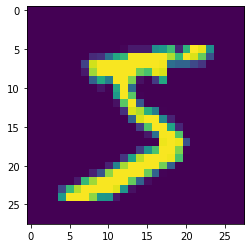

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

Basic AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
783/2

391.5

Model Building

Encoder

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

Decoder

In [9]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [10]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Training

In [11]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2474 - accuracy: 0.0910 - val_loss: 0.2123 - val_accuracy: 0.1341
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1845 - accuracy: 0.1627 - val_loss: 0.1665 - val_accuracy: 0.1805
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1602 - accuracy: 0.1992 - val_loss: 0.1605 - val_accuracy: 0.1821
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1490 - accuracy: 0.2165 - val_loss: 0.1440 - val_accuracy: 0.2089
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1429 - accuracy: 0.2247 - val_loss: 0.1390 - val_accuracy: 0.2283


In [12]:
passed_images = autoencoder.predict(X_test[:10])

Visualization

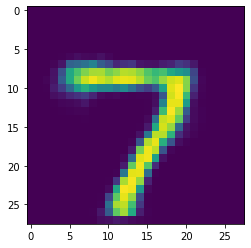

In [13]:
plt.imshow(passed_images[0])

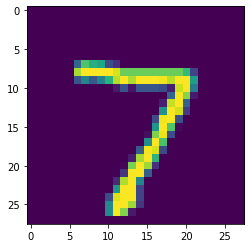

In [14]:
plt.imshow(X_test[0])

AutoEncoder For Denoising Images

In [15]:
from tensorflow.keras.layers import GaussianNoise

In [16]:
sample = GaussianNoise(0.2)

In [17]:
noisey = sample(X_test[0:2],training=True)

Visualization

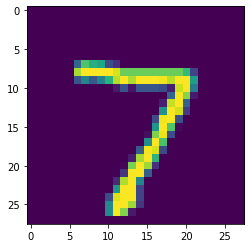

In [18]:
plt.imshow(X_test[0])

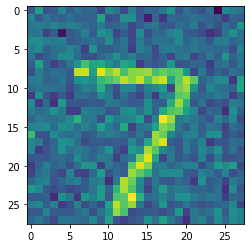

In [19]:
plt.imshow(noisey[0])

Create Noise Removal AutoEncoder and Train it

Encoder

In [20]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)
# Building Model Again

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

Decoder

In [21]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [22]:
noise_remover = Sequential([encoder, decoder])

In [23]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

Training Again

In [24]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1698 - accuracy: 0.1809 - val_loss: 0.1346 - val_accuracy: 0.2276
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1297 - accuracy: 0.2330 - val_loss: 0.1204 - val_accuracy: 0.2411
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1197 - accuracy: 0.2478 - val_loss: 0.1122 - val_accuracy: 0.2539
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1142 - accuracy: 0.2570 - val_loss: 0.1080 - val_accuracy: 0.2642
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1105 - accuracy: 0.2642 - val_loss: 0.1051 - val_accuracy: 0.2689
Epoch 6/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1076 - accuracy: 0.2701 - val_loss: 0.1044 - val_accuracy: 0.2780
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1055 - accuracy: 0.2744 - val_loss: 0.1011 - val_accuracy: 0.2816

In [25]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

Visualization

The Original


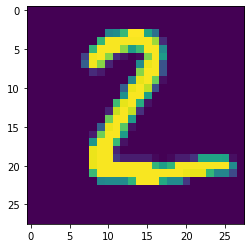

The Noisey Version


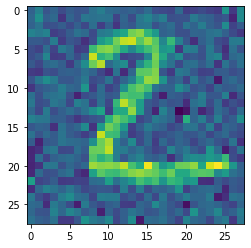

After going through denoiser


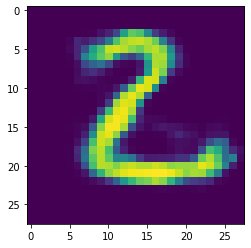

In [26]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

Note: AutoEncoder is Semi-Supervised Learning